In [1]:
#导入必备的工具包
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#设置显示风格
plt.style.use('fivethirtyeight')

In [3]:
#利用pandas读取训练集和验证集
train_data = pd.read_csv("/home/ly/NLP_study/02文本的预处理/cn_data/train.tsv",sep="\t")
dev_data = pd.read_csv("/home/ly/NLP_study/02文本的预处理/cn_data/dev.tsv",sep="\t")

<function matplotlib.pyplot.show(close=None, block=None)>

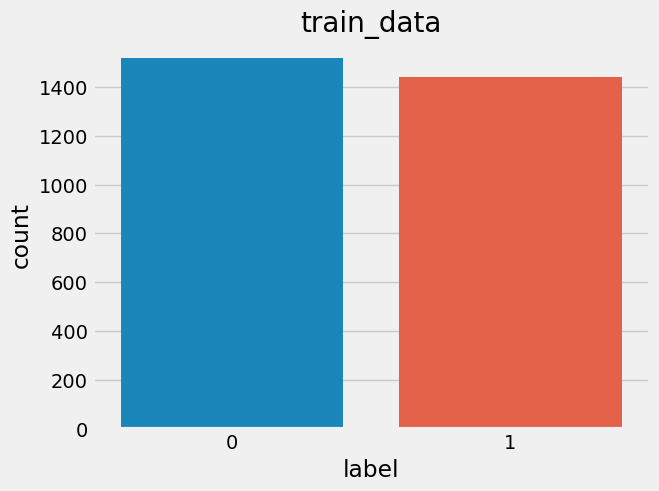

In [5]:
#获得训练数据的标签数量分布
sns.countplot(x="label",data = train_data)
plt.title("train_data")
plt.show

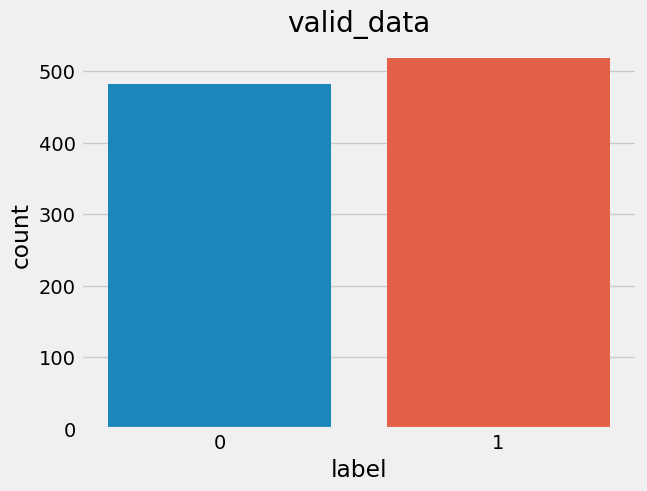

In [6]:
#获得验证集的标签数量分布
sns.countplot(x="label",data = dev_data)
plt.title("valid_data")
plt.show()

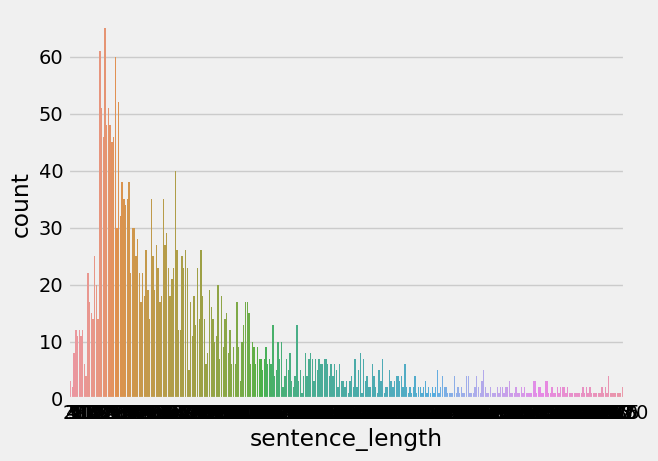

In [13]:
#在训练数据中添加句子长度列，每个元素的值都对应句子的长度
train_data["sentence_length"] = list(map(lambda x:len(x),train_data["sentence"]))
#绘制句子长度的数量分布
sns.countplot(x="sentence_length",data = train_data)
#plt.yticks([])
plt.show()

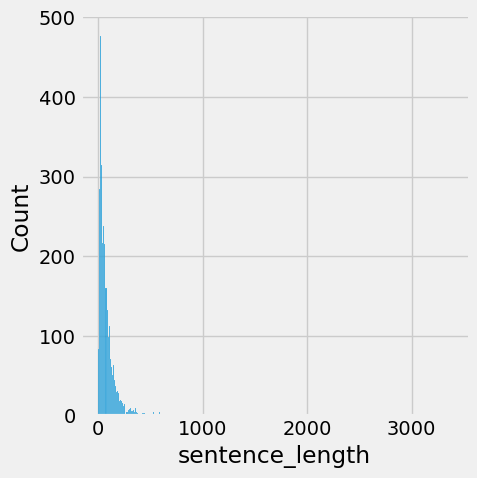

In [14]:
#绘制dist长度分布图
sns.displot(train_data["sentence_length"])
#plt.yticks([])
plt.show()

In [15]:
#在验证集上添加句子的长度列，每个元素对应句子 的长度
dev_data["sentence_length"] = list(map(lambda x: len(x),dev_data["sentence"]))
                            

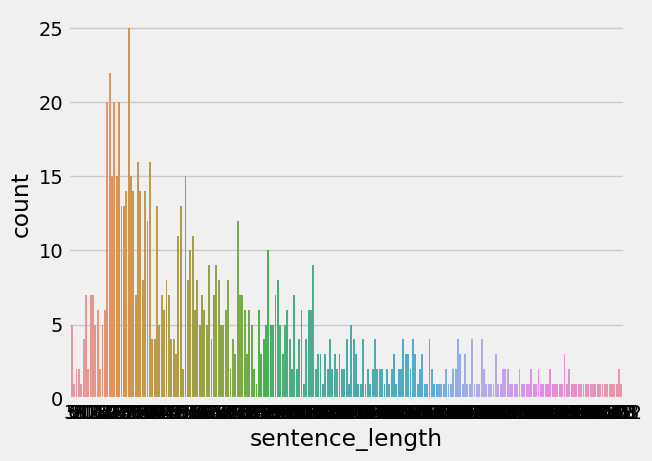

In [16]:
#绘制句子的长度数量分布图
sns.countplot(x = "sentence_length",data=dev_data)
plt.show()

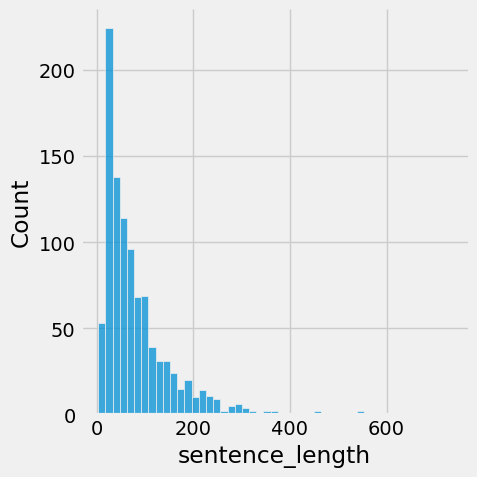

In [17]:
#绘制句子dist长度分布图
sns.displot(dev_data["sentence_length"])
plt.show()

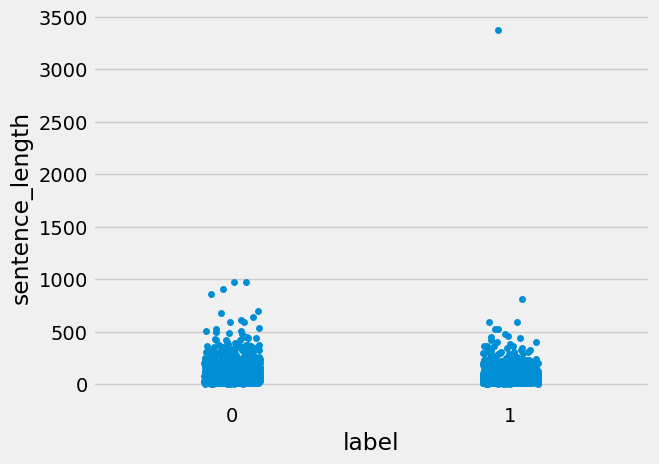

In [18]:
#绘制训练集长度分布的散点图
sns.stripplot(y = 'sentence_length',x = 'label',data = train_data)
plt.show()

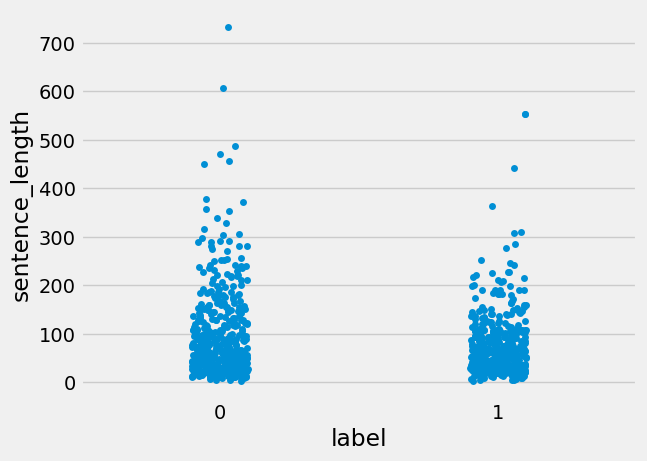

In [19]:
#绘制验证集的句子长度的散点图
sns.stripplot(y = 'sentence_length',x = 'label',data = dev_data)
plt.show()

In [20]:
#导入jieba工具包
#导入chain方法用于扁平化列表
import jieba
from itertools import chain


In [21]:
#进行训练集句子分词，并且统计不同词汇的总数
train_vocab = set(chain(*map(lambda x: jieba.lcut(x),train_data["sentence"])))
print("训练集一共包含的词汇数为：",len(train_vocab))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.929 seconds.
Prefix dict has been built successfully.


训练集一共包含的词汇数为： 12162


In [23]:
#进行验证集句子的分词，并且统计不同词汇的总数
dev_vocab = set(chain(*map(lambda x: jieba.lcut(x),dev_data["sentence"])))
print("验证集一共包含的分词有：",len(dev_vocab))

验证集一共包含的分词有： 6857


In [28]:
for i in map(lambda x: jieba.lcut(x),train_data["sentence"]):
    print("====",len(set(chain(*i))))

==== 25
==== 60
==== 55
==== 53
==== 33
==== 27
==== 71
==== 55
==== 23
==== 188
==== 55
==== 93
==== 168
==== 31
==== 31
==== 61
==== 46
==== 55
==== 29
==== 24
==== 21
==== 64
==== 56
==== 95
==== 80
==== 31
==== 62
==== 89
==== 29
==== 45
==== 28
==== 43
==== 19
==== 110
==== 47
==== 48
==== 104
==== 23
==== 188
==== 59
==== 38
==== 48
==== 55
==== 30
==== 21
==== 32
==== 44
==== 33
==== 27
==== 104
==== 108
==== 37
==== 50
==== 43
==== 71
==== 26
==== 29
==== 20
==== 20
==== 62
==== 57
==== 83
==== 48
==== 23
==== 34
==== 38
==== 81
==== 89
==== 197
==== 58
==== 57
==== 128
==== 59
==== 15
==== 22
==== 23
==== 33
==== 20
==== 35
==== 92
==== 19
==== 39
==== 103
==== 65
==== 112
==== 41
==== 71
==== 95
==== 32
==== 55
==== 5
==== 56
==== 32
==== 7
==== 39
==== 27
==== 48
==== 78
==== 136
==== 28
==== 23
==== 20
==== 38
==== 43
==== 115
==== 7
==== 107
==== 108
==== 18
==== 4
==== 47
==== 71
==== 84
==== 76
==== 72
==== 110
==== 42
==== 55
==== 33
==== 53
==== 19
==== 84
==== 64
====

In [41]:
#导入jieba库里的词性标注工具
import jieba.posseg as pseg

In [42]:
#定义获取文本形容词的列表函数
def get_a_list(text):
    #使用jieba的词性标注方法来切分文本，得到两个属性：word\flag
    #利用flag属性来判断一个词是否属于形容词
    r = []
    for g in pseg.lcut(text):
        if g.flag =='a':
            r.append(g.word)
    return r

In [43]:
#导入绘制词云的工具包
from wordcloud import WordCloud

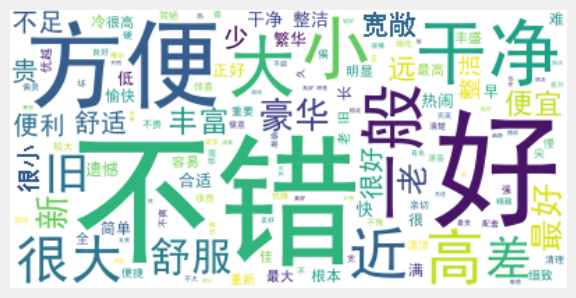

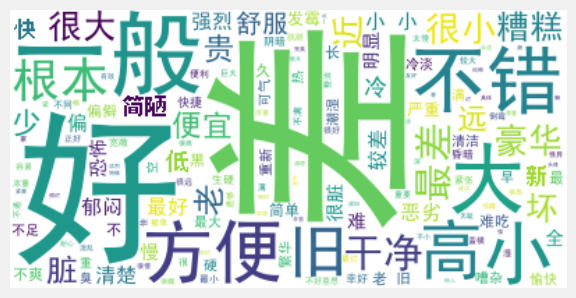

In [46]:
#定义获取词云 的函数并且画图
def get_word_cloud(keywords_list):
    #首先实例化词云类对象，里面有三个参数
    #第一个参数是font_path:词云显示字体的路径
    #第二个参数是max_word：词云显示最多的字数
    #第三个参数是backgroud_color:代表图片的背景颜色
    wordcloud = WordCloud(font_path="/home/ly/NLP_study/02文本的预处理/SimHei.ttf",max_words=200,background_color="white")
    #将传入的词云列表形式转化为字符串形式，为什么ne？因为词云要求的是字符串形式。
    keyword_string = " ".join(keywords_list)
    #生成词云
    wordcloud.generate(keyword_string)
    #绘图
    plt.figure
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

#获取训练集上的正样本
p_train_data = train_data[train_data["label"]==1]["sentence"]
#对正样本每个句子提取形容词
train_p_a_vocab = chain(*map(lambda x :get_a_list(x),p_train_data))

#获取训练集上的负样本
n_train_data = train_data[train_data["label"]==0]["sentence"]
#获取负样本上的形容词
train_n_a_vocab = chain(*map(lambda x:get_a_list(x),n_train_data))

#调用获取词云的函数
get_word_cloud(train_p_a_vocab)
get_word_cloud(train_n_a_vocab)


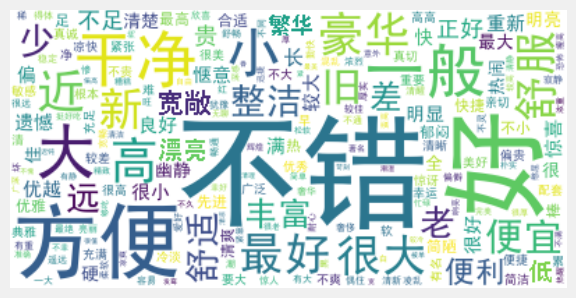

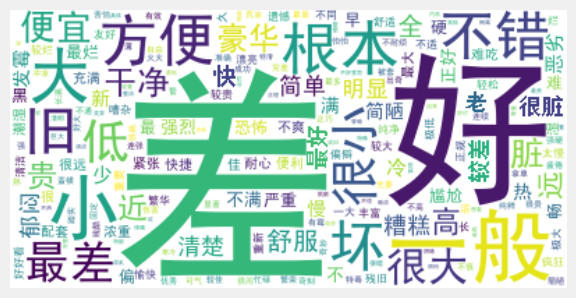

In [47]:
#获取验证集上的正样本
p_dev_data = dev_data[dev_data["label"]==1]["sentence"]
#获取验证集正样本的形容词
dev_p_a_vocab = chain(*map(lambda x :get_a_list(x),p_dev_data))
#print(dev_p_a_vocab)
#获得验证集的负样本
dev_n_data = dev_data[dev_data["label"]==0]["sentence"]
#获得验证集负样本的形容词
dev_n_a_vocab = chain(*map(lambda x :get_a_list(x),dev_n_data))
#绘制验证集的正样本、负样本词云
get_word_cloud(dev_p_a_vocab)
get_word_cloud(dev_n_a_vocab)